# KAGGLE COMPETITION

# STEEL PLATE DEFECT PREDICTION

### IMPORTING THE NECESSARY LIBRARIES

In [25]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **GOAL OF THE PROJECT**:  Predict the probability of various defects on steel plates.

### LOAD THE DATASET

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


### BASIC CHEKCS

In [4]:
train.shape

(19219, 35)

In [5]:
test.shape

(12814, 28)

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [8]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

## DATA ANALYSIS

### Spatial Features:
- **'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum'**: Coordinates of the bounding box of the defect.
- **'X_Perimeter', 'Y_Perimeter'**: Perimeter of the defect in the X and Y directions.

### Size and Shape Features:
- **'Pixels_Areas'**: Total number of pixels that make up the defect.
- **'LogOfAreas'**: Logarithmic transformation of 'Pixels_Areas'.
- **'Log_X_Index', 'Log_Y_Index'**: Logarithmic transformations of 'X_Index' and 'Y_Index'.
- **'Edges_Index', 'Empty_Index', 'Square_Index'**: Indices related to the shape of the defect.
- **'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index'**: Indices related to the location of the defect.

### Luminosity Features:
- **'Sum_of_Luminosity'**: Total brightness of the defect.
- **'Minimum_of_Luminosity', 'Maximum_of_Luminosity'**: The darkest and brightest points of the defect.
- **'Luminosity_Index'**: Index related to the overall brightness of the defect.

### Production Process Features:
- **'Length_of_Conveyer'**: Length of the conveyor belt used in manufacturing.
- **'Steel_Plate_Thickness'**: Thickness of the steel plate.
- **'TypeOfSteel_A300', 'TypeOfSteel_A400'**: Categorical features indicating the type of steel used.

### Transformation Features:
- **'SigmoidOfAreas'**: Sigmoid transformation of the 'Pixels_Areas' feature.

### Defect Type Features:
- **'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'**: Binary or categorical features indicating the presence or absence of specific types of defects.

In [9]:
# lets undestand the data without target columns

train.iloc[:,:-7].describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


Before passing to the visualization exploration let´s capture some relevant information gained from this preliminary analysis:

* We maked sure that there are no NaN or null values on data
* We can describe some behavior of data distribution from some stats metrics like std.
* The objective is to target predictions considering 7 different classes.

## Exploratory Data Analysis

## Summary Statistics

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


## **Univariate Analysis**

  0%|                                                                                           | 0/23 [00:00<?, ?it/s]

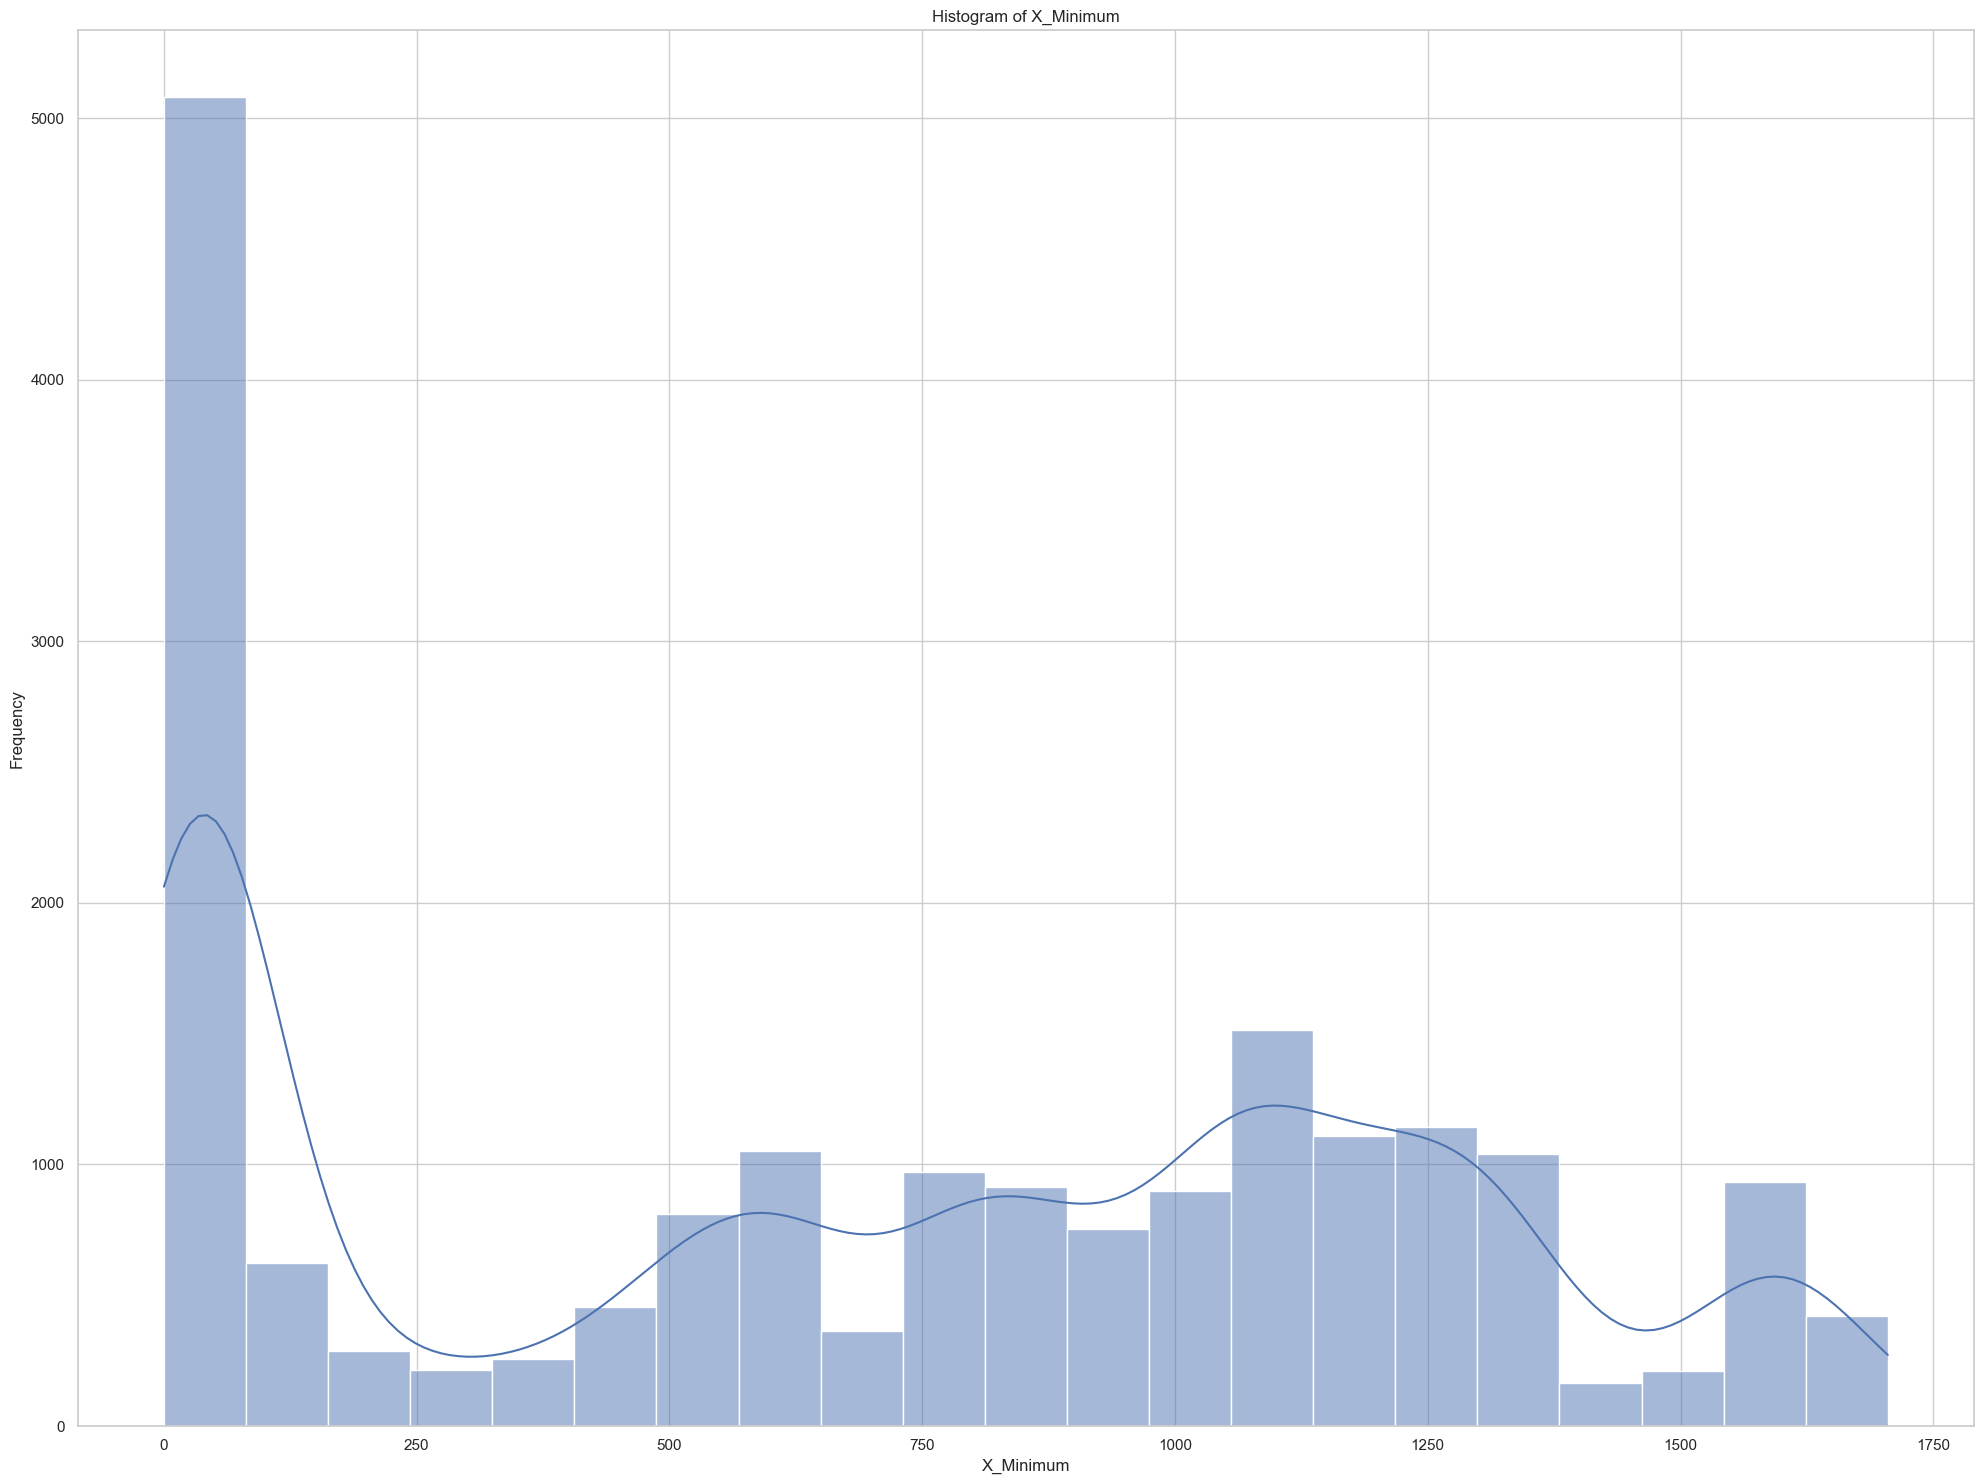

  4%|███▌                                                                               | 1/23 [00:05<02:11,  5.98s/it]

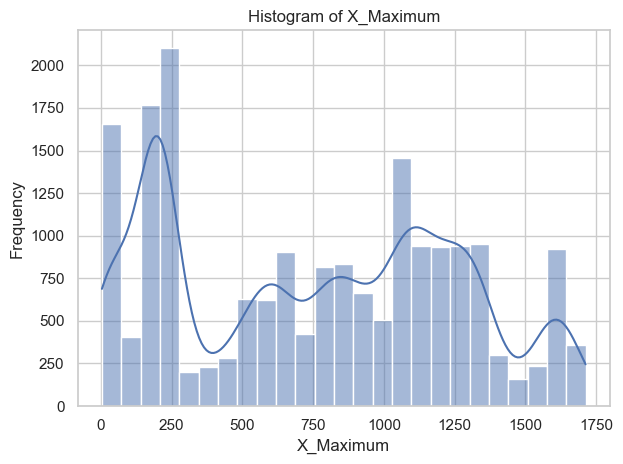

  9%|███████▏                                                                           | 2/23 [00:08<01:17,  3.69s/it]

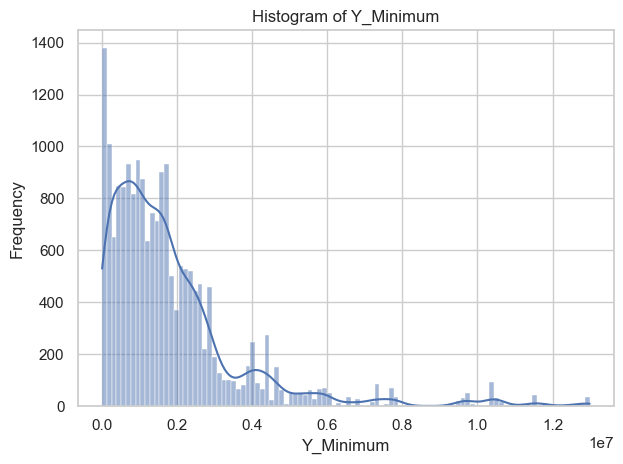

 13%|██████████▊                                                                        | 3/23 [00:10<01:03,  3.19s/it]

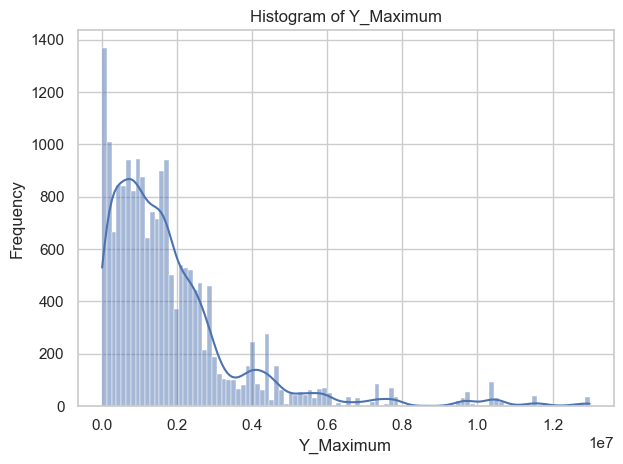

 17%|██████████████▍                                                                    | 4/23 [00:13<00:56,  2.97s/it]

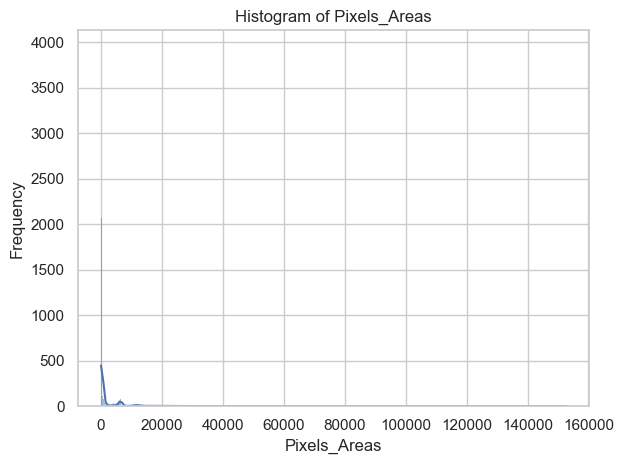

 22%|██████████████████                                                                 | 5/23 [00:38<03:18, 11.03s/it]

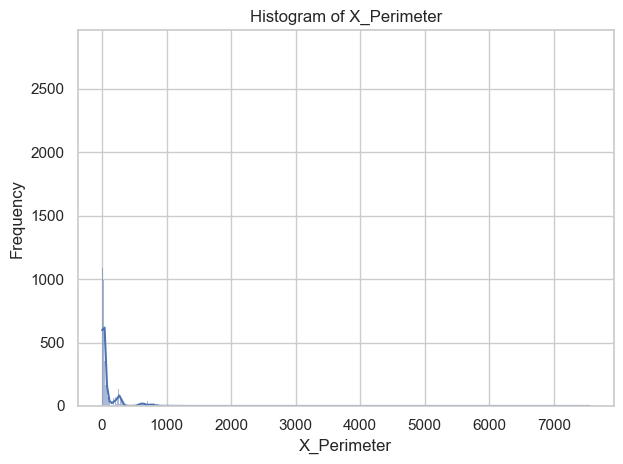

 26%|█████████████████████▋                                                             | 6/23 [00:55<03:43, 13.16s/it]

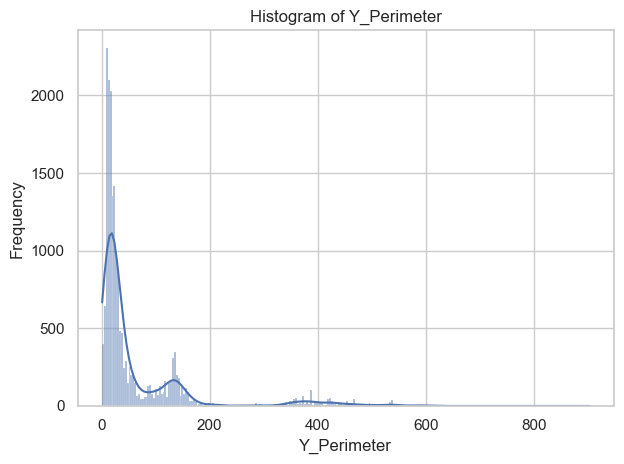

 30%|█████████████████████████▎                                                         | 7/23 [00:59<02:39,  9.98s/it]

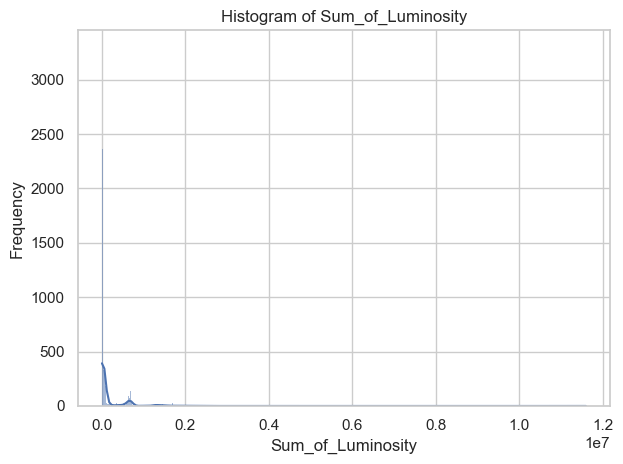

 35%|████████████████████████████▊                                                      | 8/23 [01:19<03:19, 13.28s/it]

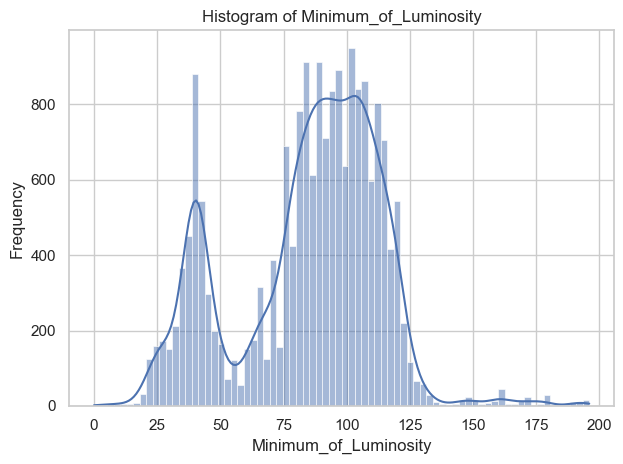

 39%|████████████████████████████████▍                                                  | 9/23 [01:21<02:17,  9.82s/it]

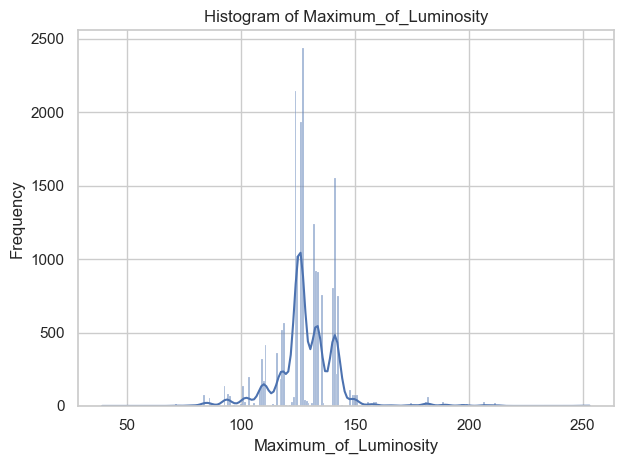

 43%|███████████████████████████████████▋                                              | 10/23 [01:25<01:42,  7.92s/it]

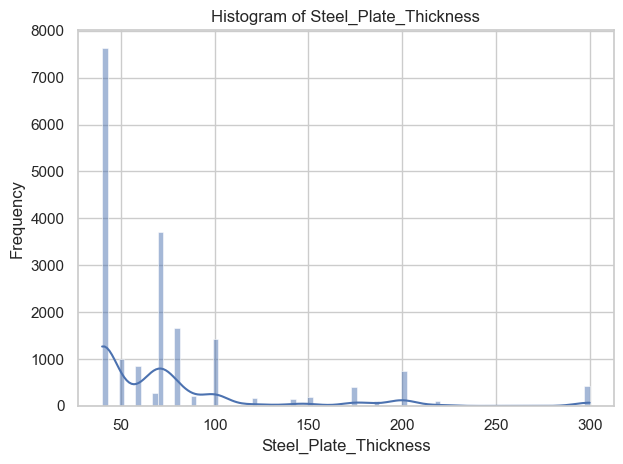

 48%|███████████████████████████████████████▏                                          | 11/23 [01:28<01:15,  6.33s/it]

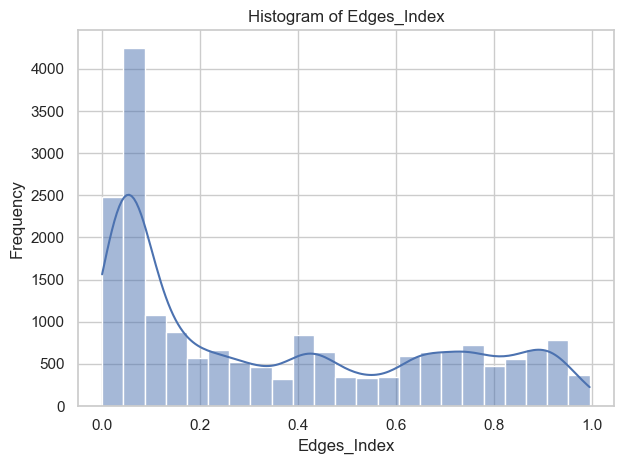

 52%|██████████████████████████████████████████▊                                       | 12/23 [01:30<00:57,  5.22s/it]

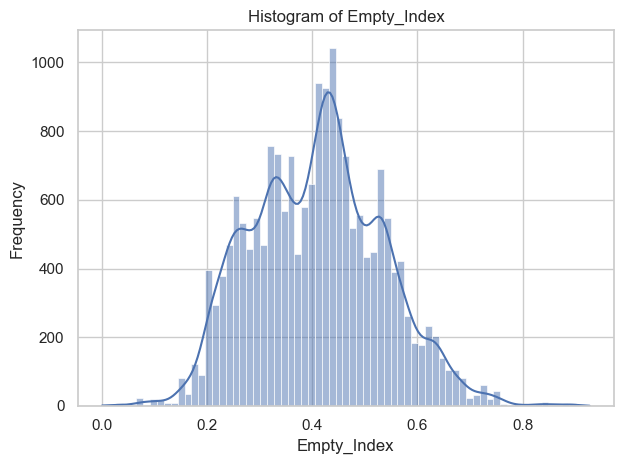

 57%|██████████████████████████████████████████████▎                                   | 13/23 [01:33<00:45,  4.51s/it]

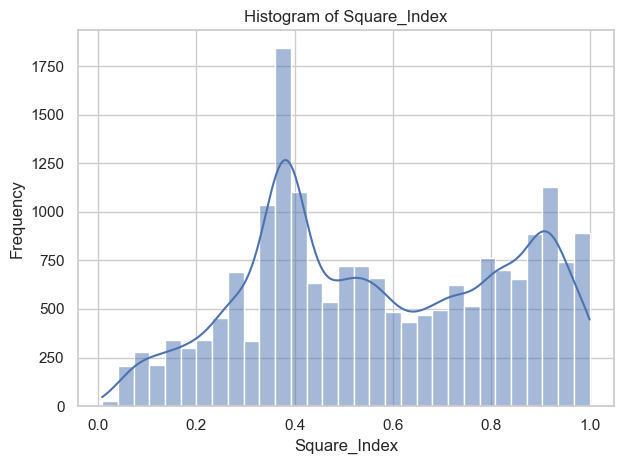

 61%|█████████████████████████████████████████████████▉                                | 14/23 [01:36<00:36,  4.01s/it]

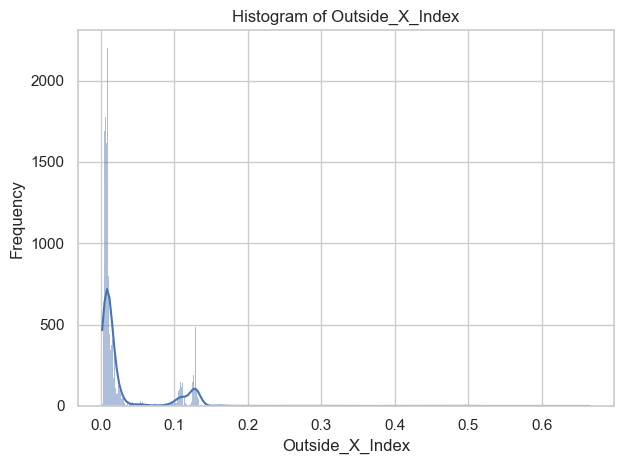

 65%|█████████████████████████████████████████████████████▍                            | 15/23 [01:47<00:48,  6.00s/it]

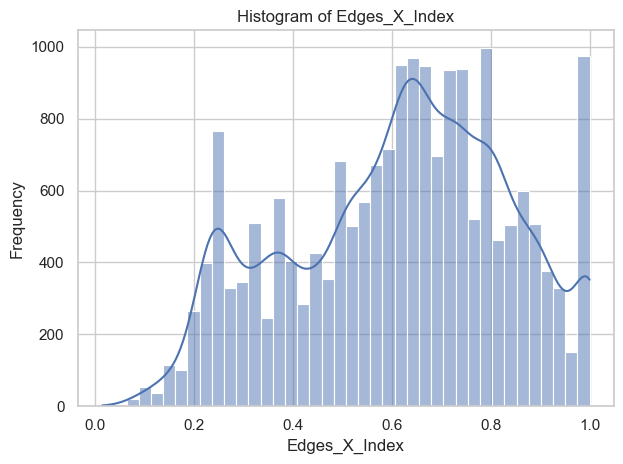

 70%|█████████████████████████████████████████████████████████                         | 16/23 [01:49<00:33,  4.80s/it]

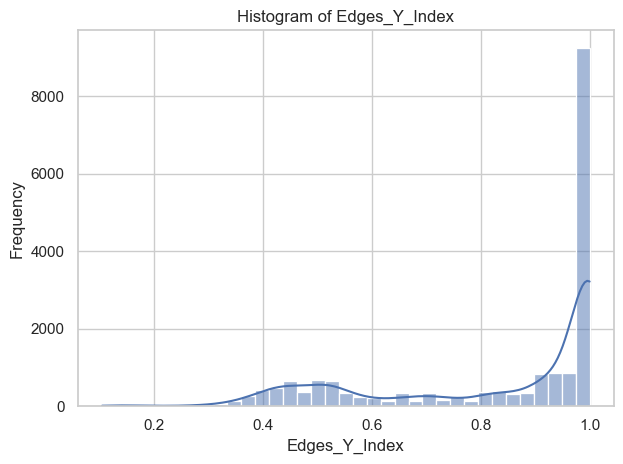

 74%|████████████████████████████████████████████████████████████▌                     | 17/23 [01:51<00:23,  3.89s/it]

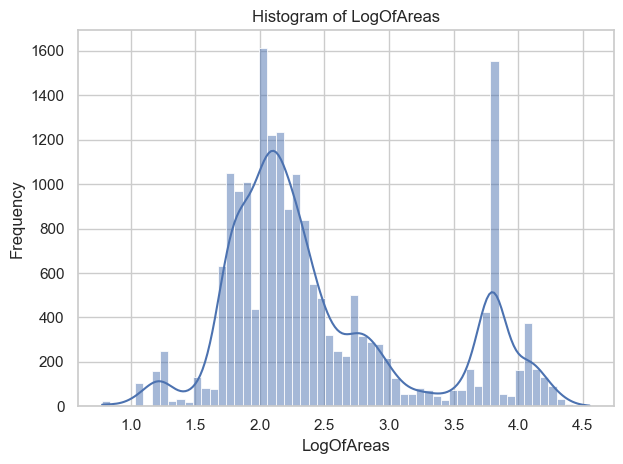

 78%|████████████████████████████████████████████████████████████████▏                 | 18/23 [01:53<00:16,  3.36s/it]

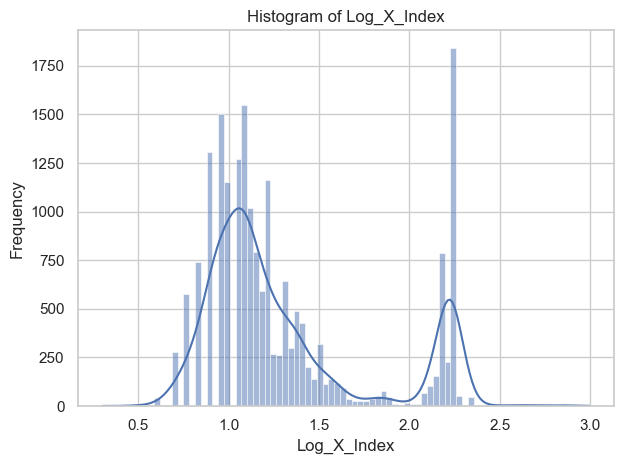

 83%|███████████████████████████████████████████████████████████████████▋              | 19/23 [01:55<00:12,  3.01s/it]

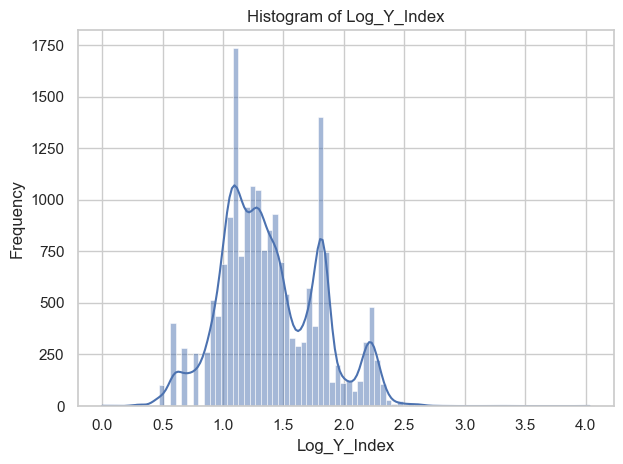

 87%|███████████████████████████████████████████████████████████████████████▎          | 20/23 [01:57<00:08,  2.84s/it]

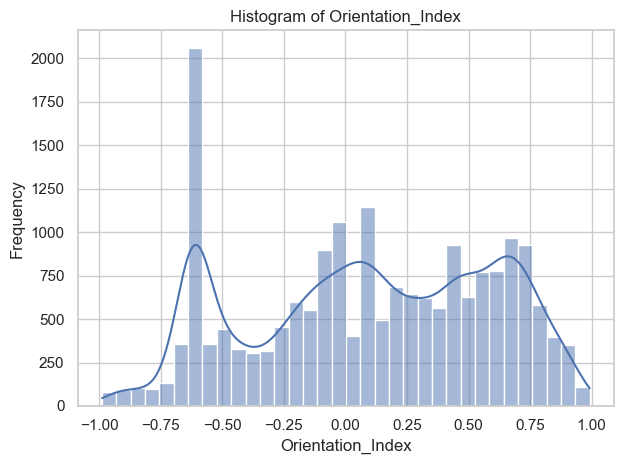

 91%|██████████████████████████████████████████████████████████████████████████▊       | 21/23 [01:59<00:05,  2.60s/it]

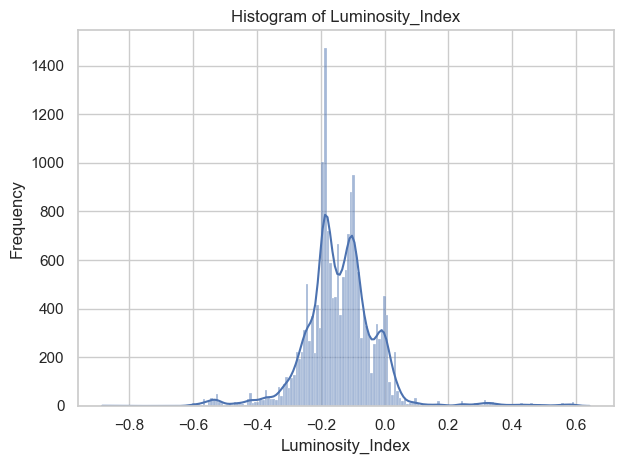

 96%|██████████████████████████████████████████████████████████████████████████████▍   | 22/23 [02:02<00:02,  2.73s/it]

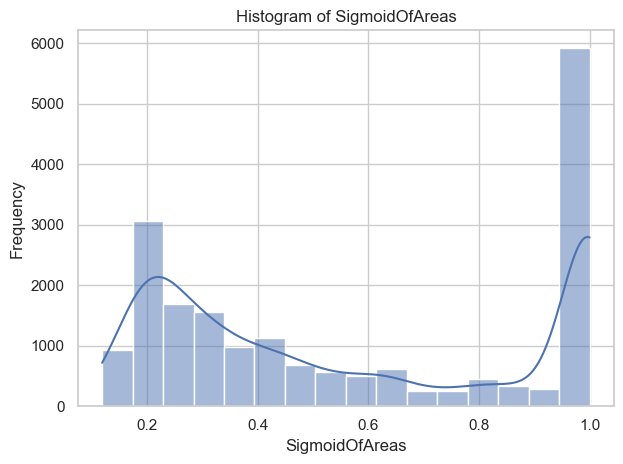

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [02:04<00:00,  5.42s/it]

univariate analysis plots: 


In [11]:
# set the style of the seaborn 
sns.set(style="whitegrid")

# Initialize the fig
plt.figure(figsize=(20,15))

# List of numerical columns for univariate analysis
numerical_cols = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']

# plotting histogram for Numerical column
for col in tqdm(numerical_cols):
    sns.histplot(train[col], kde=True)
    plt.title('Histogram of '+ col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    # Adjust layout and spacing
    plt.tight_layout()
    plt.show()
    
print('univariate analysis plots: ')

## Analysis:

1. **X_Minimum and X_Maximum**:
   - The distribution of values for X_Minimum and X_Maximum appears to be relatively uniform, with some variations in the frequency of values.

2. **Y_Minimum and Y_Maximum**:
   - Y_Minimum and Y_Maximum also exhibit a somewhat uniform distribution, with a range of values present in the dataset.

3. **Pixels_Areas and X_Perimeter**:
   - Pixels_Areas and X_Perimeter show a right-skewed distribution, indicating that there may be outliers with higher values in these features.

4. **Y_Perimeter and Sum_of_Luminosity**:
   - Y_Perimeter and Sum_of_Luminosity have distributions that are slightly skewed to the right, suggesting the presence of outliers with higher values.

5. **Minimum_of_Luminosity and Maximum_of_Luminosity**:
   - The distribution of Minimum_of_Luminosity and Maximum_of_Luminosity appears to be relatively uniform, with values spread across the range.

6. **Steel_Plate_Thickness and Edges_Index**:
   - Steel_Plate_Thickness and Edges_Index exhibit varying distributions, with Steel_Plate_Thickness showing a more uniform distribution compared to Edges_Index.

7. **Empty_Index and Square_Index**:
   - Empty_Index and Square_Index have distributions that are relatively uniform, indicating a spread of values across these features.

8. **Outside_X_Index and Edges_X_Index**:
   - Outside_X_Index and Edges_X_Index show distributions with some variations in the frequency of values, suggesting different patterns in the data.

9. **Edges_Y_Index and LogOfAreas**:
   - Edges_Y_Index and LogOfAreas exhibit distributions that are relatively uniform, with values spread across the range of the features.

10. **Log_X_Index and Log_Y_Index**:
    - Log_X_Index and Log_Y_Index show distributions that are somewhat skewed, indicating potential outliers or non-uniformity in the data.

11. **Orientation_Index and Luminosity_Index**:
    - Orientation_Index and Luminosity_Index have distributions that vary, with some values occurring more frequently than others.

12. **SigmoidOfAreas**:
    - SigmoidOfAreas shows a distribution with variations in the frequency of values, suggesting different patterns in the data.

These observations provide initial insights into the distribution of numerical features in the dataset

## **Bivariate Analysis**

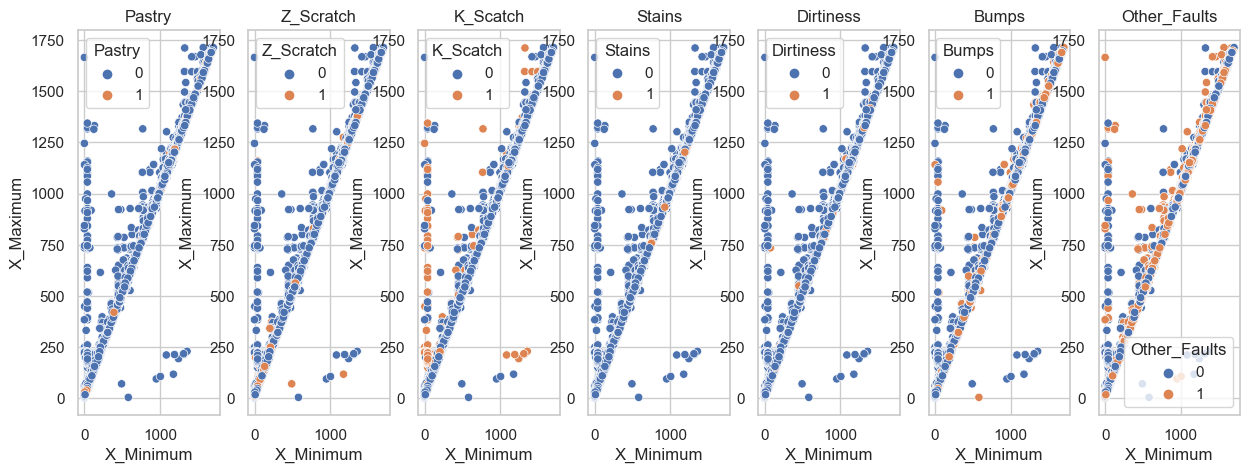

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15,5))

for i, target_name in enumerate(train.iloc[:, -7:].columns):
    if i < 7:  # Ensure we don't exceed the number of subplots
        ax = axes[i]  # Select the appropriate subplot
        sns.scatterplot(data=train, y='X_Maximum', x='X_Minimum', hue=target_name, ax=ax)
        ax.set_title(target_name)  # Set the title for each subplot
plt.show()

Right now we can´t observe a clear split of data from this type of plot, let´s try to show the distribution of data.

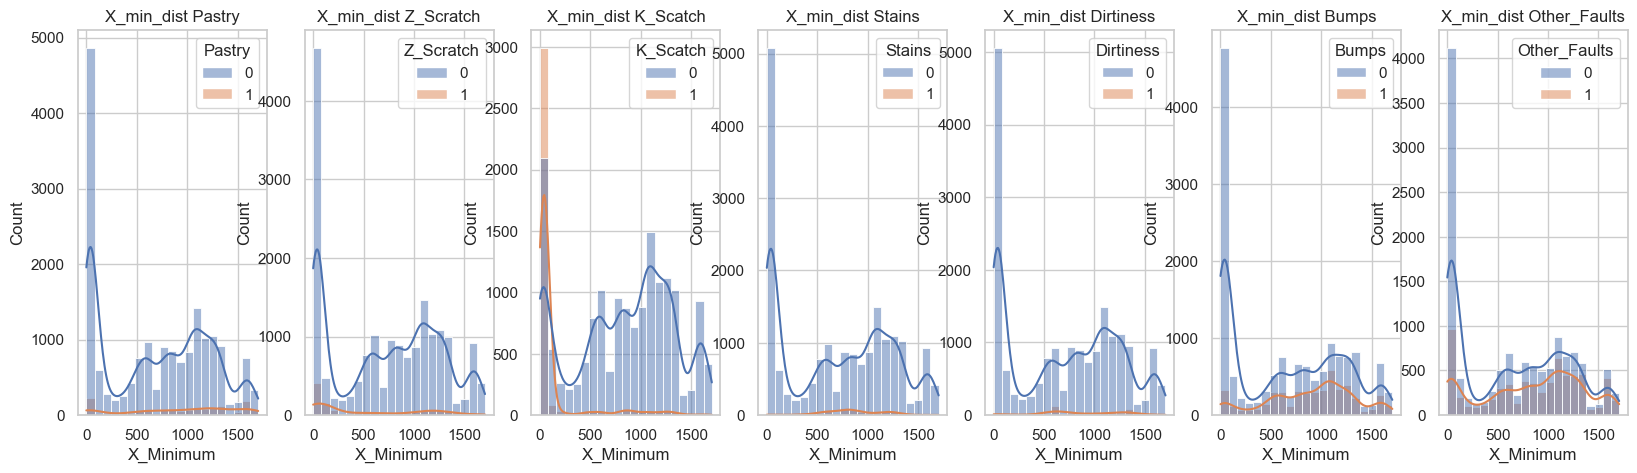

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))
for i, target_name in enumerate(train.iloc[:, -7:].columns):
  sns.histplot(data=train, x="X_Minimum", ax=axes[i], hue=target_name, kde=True)
  axes[i].set_title(f"X_min_dist {target_name}")
    
plt.show()


## **Multivariate Analysis**

<Figure size 2500x800 with 0 Axes>

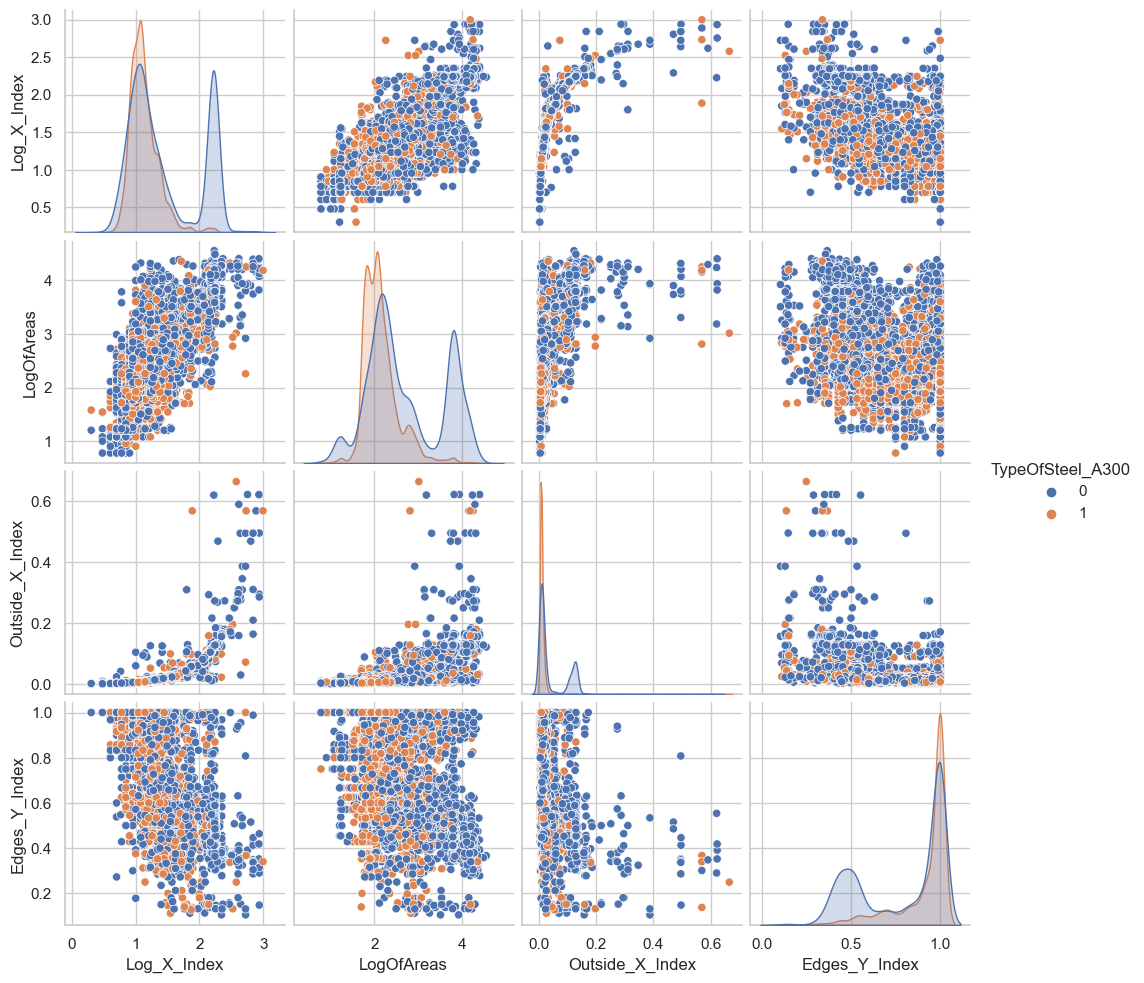

In [15]:
plt.figure(figsize=(25,8))
sns.pairplot(data=train, vars=["Log_X_Index", "LogOfAreas", "Outside_X_Index", "Edges_Y_Index"], hue="TypeOfSteel_A300")

## Correlation Matrix

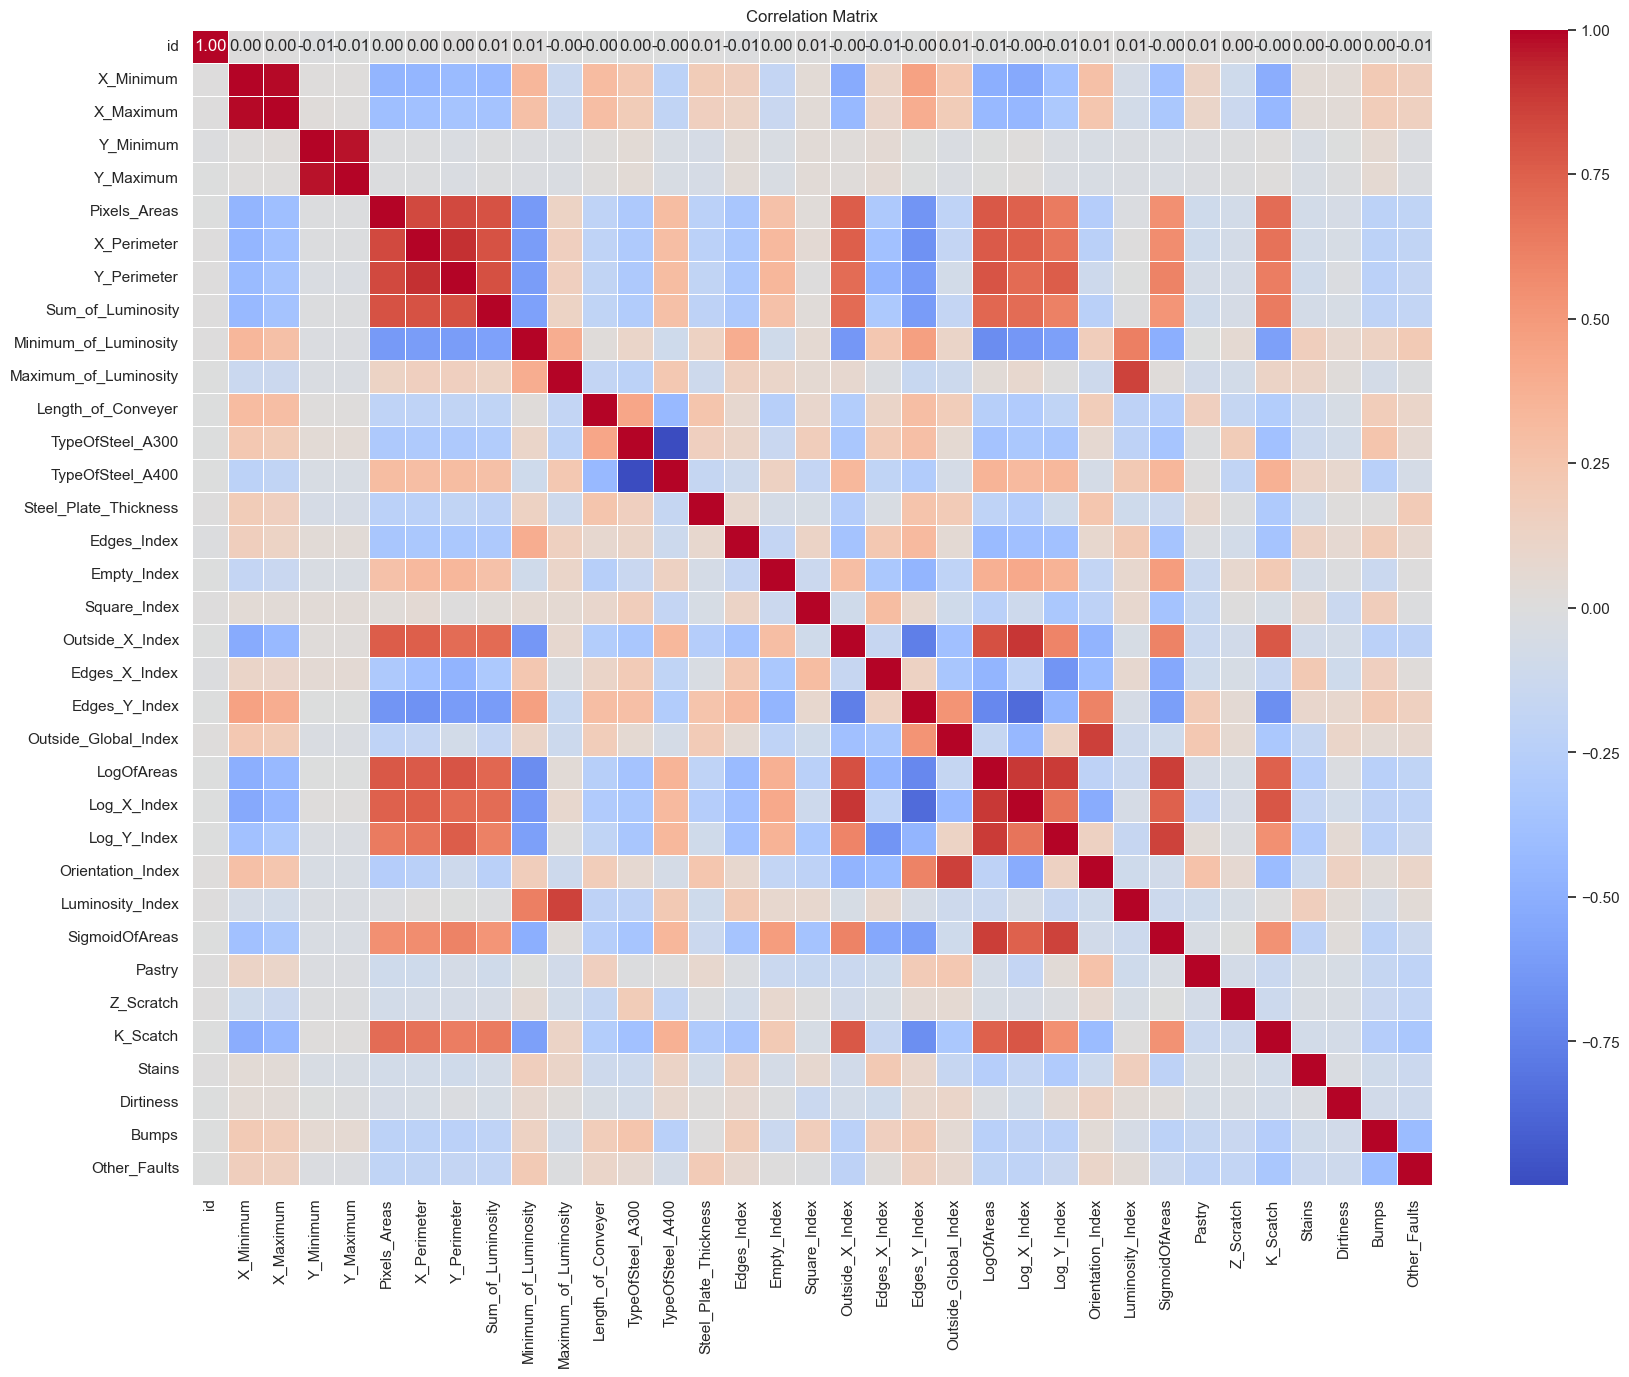

In [16]:
# Compute the correlation matrix
corr_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Splitting the dataset into training and testing

In [19]:
X=train.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'])
y=train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults' ]]

In [20]:
!pip install CatBoost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.1 MB 2.3 MB/s eta 0:00:45
   ---------------------------------------- 0.3/101.1 MB 2.0 MB/s eta 0:00:50
   ---------------------------------------- 0.5/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.1 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.1 MB 919.0 kB/s eta 0:01:50
   --

## MODEL CREATION

In [26]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
predictions = gnb.predict(X_test)
predictions

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 79.5


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a k-NN classifier with k=5 (you can adjust the value of k)
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier
knn.fit(X_train, y_train)

# Making predictions on the testing set
predictions = knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 81.0


In [30]:
predictions

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1])

In [31]:
target_cols=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
               'Dirtiness', 'Bumps', 'Other_Faults']

In [32]:
def plot_distribution(data,cols):
  for col in cols:
     value_counts=data[col].value_counts()

     fig,ax=plt.subplots(figsize=(6,4))
     sns.barplot(x=value_counts.index,y=value_counts.values,ax=ax,palette="pastel")
     ax.set_xlabel(col,fontsize=10)
     ax.set_ylabel("count",fontsize=12)
     ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=6)

     for idx,num in enumerate(value_counts):
      ax.text(idx,num, str(num), ha='center', va='bottom', fontsize=6)
  plt.title(f"Distribution of {col}")

  plt.tight_layout()
  plt.show()

In [33]:
def featrue_engineer(df):
  df["width"]=df["X_Maximum"]-df["X_Minimum"]
  df["height"]=df["Y_Maximum"]-df["Y_Minimum"]

  df["density"]= df['Pixels_Areas'] / (df['X_Perimeter'] + df['Y_Perimeter'])
  df["average_luminosity"]=(df['Sum_of_Luminosity'] + df['Minimum_of_Luminosity']) / 2

  return(df)

In [38]:
train=featuree_engineer(train)
test=feature_engineer(test)

In [39]:
feature_cols=[x for x in train.columns if x not in target_cols]

In [40]:
train_x=train[feature_cols]

train_y=train[target_cols]

In [41]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=42)
RFC.fit(train_x,train_y)
feature_importance=RFC.feature_importances_
feature_importance_df=pd.DataFrame({"Feature":train_x.columns,"Importance":feature_importance}).sort_values(by="Importance",ascending=False)

In [42]:
top_26_features=feature_importance_df.head(26)

In [43]:
train_x=train_x[top_26_features.Feature.values]
test=test[top_26_features.Feature.values]

In [44]:
x_train,x_val,y_train,y_val=train_test_split(train_x,train_y,test_size=0.2,random_state=42)
def auc_score(estimator,x,y):
  y_prob=estimator.predict_proba(x)
  return roc_auc_score(y,y_prob,multi_class="ovr")

In [45]:
best_params =  {'n_estimators': 880,
              'learning_rate': 0.015104323232513497,
              'gamma': 0.39584318371982985,
              'reg_alpha': 0.32278378258662743,
              'reg_lambda': 0.9232746535986651,
              'max_depth': 3,
              'min_child_weight': 13,
              'subsample': 0.5038891023587624,
              'colsample_bytree': 0.5216279629980719,
              'random_state': 629
             }

In [46]:
xgb=XGBClassifier(**best_params)
mean_score=cross_val_score(xgb,x_train,y_train,scoring=auc_score,cv=5)
print(f"AUC score {mean_score.mean()}")

AUC score 0.8814316520051957


In [47]:
xgb.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5216279629980719, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.39584318371982985,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015104323232513497,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=880, n_jobs=None,
              num_parallel_tree=None, random_state=629, ...)

In [48]:
y_pred=xgb.predict_proba(test)
y_pred

array([[3.5965765e-01, 1.8513536e-03, 2.9113062e-03, ..., 1.4917690e-02,
        1.9371119e-01, 5.0205910e-01],
       [2.1024485e-01, 2.1369452e-02, 1.0062215e-02, ..., 2.2063312e-01,
        1.4419013e-01, 3.7762213e-01],
       [2.6244200e-03, 3.6009505e-02, 4.0190514e-02, ..., 1.1344908e-02,
        2.7198619e-01, 4.9364570e-01],
       ...,
       [1.3633332e-03, 8.1285444e-04, 9.2722505e-01, ..., 1.6698256e-03,
        1.5595997e-03, 1.1604247e-01],
       [3.7357488e-01, 1.2028010e-02, 2.3790104e-02, ..., 6.9366530e-02,
        1.5813152e-01, 3.8703671e-01],
       [4.0507754e-03, 1.0723653e-02, 9.1781360e-01, ..., 1.9461178e-03,
        2.4813961e-03, 7.5698830e-02]], dtype=float32)

In [56]:
test

,width,Outside_X_Index,Pixels_Areas,X_Perimeter,density,Log_X_Index,LogOfAreas,average_luminosity,Length_of_Conveyer,X_Maximum,...,Luminosity_Index,Orientation_Index,id,Square_Index,height,Y_Minimum,Y_Maximum,SigmoidOfAreas,Edges_X_Index,Log_Y_Index
0,18,0.0095,659,23,9.550725,1.1139,2.8410,31212.0,1656,1033,...,-0.2261,0.6727,19219,0.3273,24,3826564,3826588,0.9172,0.5652,1.6628
1,14,0.0047,370,26,6.851852,0.9031,2.5682,19692.5,1354,1271,...,-0.1453,0.9063,19220,0.0938,13,419960,419973,0.9104,0.2414,1.4472
2,14,0.0155,289,36,4.250000,1.3222,2.4609,14743.5,1360,1372,...,-0.0435,-0.5238,19221,0.4762,9,117715,117724,0.6514,0.6000,1.3222
3,10,0.0037,80,10,3.809524,0.6990,1.9031,4346.5,1690,168,...,-0.0738,0.1818,19222,0.8182,25,232415,232440,0.2051,0.8000,1.0414
4,33,0.0158,140,19,4.117647,1.3222,2.1461,7813.5,1688,592,...,-0.0894,-0.5714,19223,0.4286,14,544375,544389,0.4170,0.8421,1.1461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,15,0.0126,313,32,4.536232,1.2305,2.4955,10841.0,1353,1116,...,-0.3109,0.7661,32028,0.2339,49,447943,447992,0.8894,0.4063,1.6335
12810,17,0.0052,59,9,2.185185,0.8451,1.7708,2681.0,1362,1306,...,-0.0448,0.7222,32029,0.2778,48,3149494,3149542,0.1954,0.7778,1.2553
12811,169,0.1236,16584,796,12.582701,2.2504,4.2525,929093.0,1400,210,...,-0.0801,-0.0629,32030,0.9371,-344,1587535,1587191,1.0000,0.2199,2.2672
12812,11,0.0095,386,43,5.012987,1.1139,2.5866,18470.5,1364,1340,...,-0.2629,0.8461,32031,0.1539,30,702237,702267,0.7844,0.2407,1.5911


In [53]:
submission = pd.read_csv("submission .csv")

In [54]:
submission = pd.DataFrame(y_pred, columns=target_cols, index=test.index)
display(submission.head())

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.359658,0.001851,0.002911,0.000229,0.014918,0.193711,0.502059
1,0.210245,0.021369,0.010062,0.000514,0.220633,0.144190,0.377622
2,0.002624,0.036010,0.040191,0.001037,0.011345,0.271986,0.493646
3,0.145137,0.001888,0.002265,0.001670,0.019190,0.294414,0.500912
4,0.004483,0.001698,0.002658,0.003217,0.008580,0.597333,0.400391


In [55]:
submission

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.359658,0.001851,0.002911,0.000229,0.014918,0.193711,0.502059
1,0.210245,0.021369,0.010062,0.000514,0.220633,0.144190,0.377622
2,0.002624,0.036010,0.040191,0.001037,0.011345,0.271986,0.493646
3,0.145137,0.001888,0.002265,0.001670,0.019190,0.294414,0.500912
4,0.004483,0.001698,0.002658,0.003217,0.008580,0.597333,0.400391
...,...,...,...,...,...,...,...
12809,0.121021,0.132555,0.001707,0.000285,0.014669,0.221691,0.354308
12810,0.159659,0.004316,0.022763,0.012182,0.106683,0.155484,0.468983
12811,0.001363,0.000813,0.927225,0.000335,0.001670,0.001560,0.116042
12812,0.373575,0.012028,0.023790,0.000338,0.069367,0.158132,0.387037
